In [3]:
from typing import TypedDict
import random
from langgraph.graph import StateGraph, START, END

In [ ]:
class gamestate(TypedDict):
    player_name: str
    target_number: int
    guesses: list[int]
    attempts: int
    hint: str
    lower_bound: int
    upper_bound: int

In [5]:
def setup_node(state: gamestate) -> gamestate:
    """Initializes the game with a random target number"""
    state["player_name"] = f"welcome, {state['player_name']}!"
    state["target_number"] = random.randint(1, 20)
    state["guesses"] = []
    state["attempts"] = 0
    state["hint"] = "game statred try to guess the number"
    state["lower_bound"] = 1
    state["upper_bound"] =20
    print(f"{state['player_name']} the game has begun try to think of a number between 1 and 20")
    return state

In [7]:
def guess_node(state: gamestate) -> gamestate:
    """Generate a smarter guess based on previous hints"""
    
    possible_guesses = [i for i in range(state["lower_bound"], state["upper_bound"] + 1) if i not in state["guesses"]]
    if possible_guesses:
        guess = random.choice(possible_guesses)
    else:
        
        guess = random.randint(state["lower_bound"], state["upper_bound"])
    
    state["guesses"].append(guess)
    state["attempts"] += 1
    print(f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lower_bound']}-{state['upper_bound']})")
    return state

In [10]:
def hint_node(state: gamestate) -> gamestate:
    """gives hint based on the prvious guess"""

    latest_guess = state["guesses"][-1]
    target = state["target_number"]

    if latest_guess < target:
        state["hint"] = f"the number {latest_guess} is too low, try higher!"

        state["lower_bound"] = max(state["lower_bound"], latest_guess + 1)
        print(f"hint: {state['hint']}")

    elif latest_guess < target:
        state["hint"] = f"the number {latest_guess} is too hight, try lower!"

        state["upper_bound"] = min(latest_guess - 1, state["upper_bound"])
        print(f"hint: {state['hint']}")

    else:
        state['hint'] = f"you're correct! the number {target} in {state['attempts']} attempts"
        print(f"hint: {state['hint']}")

    return state  



In [11]:
def should_continue(state: gamestate) -> gamestate:
    """determines if we should continue gessing or end the game"""

    target = state["target_number"]
    latest_guess = state["guesses"][-1]
    if target == latest_guess:
        return "end game"
    elif state["attempts"] >= 7:
        return "end game"
    else:
        return "continue"

In [13]:
graph = StateGraph(gamestate)

graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hints", hint_node)

graph.add_edge("setup", "guess")
graph.add_edge("guess", "hints")
graph.add_conditional_edges("hints",
should_continue,
{
    "continue": "guess",
    "end game": END
}

)

graph.set_entry_point("setup")
app = graph.compile()

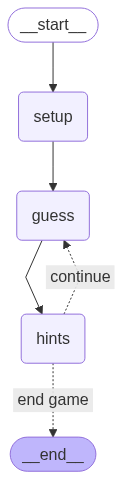

In [14]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:

result = app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})

welcome, Student! the game has begun try to think of a number between 1 and 20
Attempt 1: Guessing 4 (Current range: 1-20)
hint: the number 4 is too low, try higher!
Attempt 2: Guessing 19 (Current range: 5-20)
hint: you're correct! the number 10 in 2 attempts
Attempt 3: Guessing 15 (Current range: 5-20)
hint: you're correct! the number 10 in 3 attempts
Attempt 4: Guessing 12 (Current range: 5-20)
hint: you're correct! the number 10 in 4 attempts
Attempt 5: Guessing 11 (Current range: 5-20)
hint: you're correct! the number 10 in 5 attempts
Attempt 6: Guessing 7 (Current range: 5-20)
hint: the number 7 is too low, try higher!
Attempt 7: Guessing 18 (Current range: 8-20)
hint: you're correct! the number 10 in 7 attempts
